Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

*   Рассчитать коэффициенты корреляции Пирсона и Спирмена
*   Построить модель линейной регрессии
*   Рассчитать коэффициент детерминации
*   Вывести график остатков


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
rcParams['figure.figsize'] = 11, 7

In [2]:
water_mortality_corr_data = pd.read_csv('water.csv', index_col='Index')

mort = water_mortality_corr_data['mortality']
hardness = water_mortality_corr_data['hardness']
hardness_shape = water_mortality_corr_data[['hardness']]

In [4]:
# АНАЛИЗ ВСЕГО ОБЪЕМА ДАННЫХ, ПРОСЛЕЖИВАЕТСЯ ДОСТАТОЧНО СИЛЬНАЯ ЛИНЕЙНАЯ КОРРЕЛЯЦИЯ

# 1) Коэффициенты Пирсона и Спирмена:

pearson_corr = water_mortality_corr_data[['hardness', 'mortality']].corr('pearson')
spearman_corr = water_mortality_corr_data[['hardness', 'mortality']].corr('spearman')



In [5]:
pearson_corr

,hardness,mortality
hardness,1.0,-0.7
mortality,-0.7,1.0


In [6]:
spearman_corr

,hardness,mortality
hardness,1.0,-0.6
mortality,-0.6,1.0


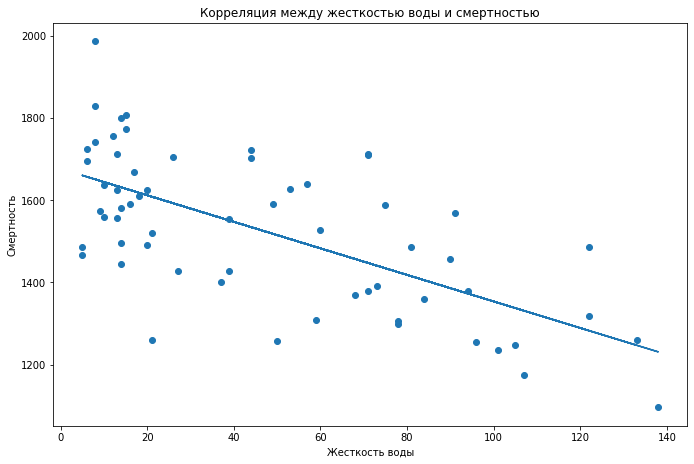

In [7]:
# 2) Точечный график:

a, b = np.polyfit (hardness, mort, 1)

fig = plt.figure()
axes = fig.add_axes([.1, .1, .8, .8])
axes.scatter(hardness, mort)
axes.set_xlabel('Жесткость воды')
axes.set_ylabel('Смертность')
axes.set_title('Корреляция между жесткостью воды и смертностью')
axes.plot (hardness, a * hardness + b)
plt.show()

In [9]:
# 3) Модель линейной регрессии:

x_train, x_test, y_train, y_test = train_test_split(hardness_shape, mort, test_size=0.30, random_state=42)

x_train.shape
y_train.shape


model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()
  

LinearRegression()

In [11]:
print(model.coef_)  #  Наклон
print(model.intercept_)   #  Пересечение с осью ординат

[-3.13167087]
1668.9722977277095


In [12]:
# Датафрейм с тестовыми и предсказанными значениями у:

y_pred = model.predict(x_test)


df_pred_and_test = pd.DataFrame()
df_pred_and_test['predicted'] = y_pred
df_pred_and_test['test'] = np.array(y_test)

print(df_pred_and_test)


    predicted  test
0      1340.1  1247
1      1637.7  1558
2      1625.1  1495
3      1531.2  1702
4      1424.7  1307
5      1606.3  1625
6      1252.5  1259
7      1434.1  1587
8      1603.2  1519
9      1650.2  1696
10     1484.2  1309
11     1415.3  1485
12     1546.8  1555
13     1625.1  1800
14     1446.6  1709
15     1546.8  1428
16     1637.7  1637
17     1622.0  1807
18     1352.7  1236


In [13]:
print(model.score(x_test, y_test)) # КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ

0.5046490611017092


In [14]:
# Выводы:
# 1) Определяется достаточно сильная обратная корреляция между жесткостью воды и смертностью
# 2) Построенная модель линейной регрессии оказалась лучше базовой модели, основанной на дисперсии

In [20]:
x_const = sm.add_constant(x_train)

model_sm = sm.OLS(y_train, x_const)
results = model_sm.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           7.83e-06
Time:                        07:04:03   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
print(results.rsquared)

0.3967890100912278


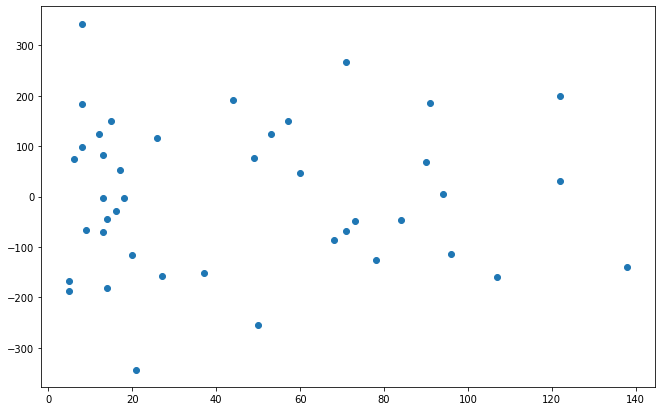

In [22]:
plt.scatter(x_const.iloc[:, 1], results.resid)
plt.show()  # График остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

*   Разделить данные на 2 группы
*   Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [18]:
# а) Северные данные:

north_mort = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'North']['mortality']
north_hardness = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'North']['hardness']
north_hardness_shape = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'North'][['hardness']]

x1_train, x1_test, y1_train, y1_test = train_test_split(north_hardness_shape, north_mort, test_size=0.30, random_state=42)

x1_const = sm.add_constant(x1_train)

model_sm1 = sm.OLS(y1_train, x1_const)
results1 = model_sm1.fit()
print(results1.summary())



                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sun, 30 Oct 2022   Prob (F-statistic):             0.0316
Time:                        07:02:49   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

PARAMS:  const      1688.2
hardness     -2.0
dtype: float64
0.19322282610033503


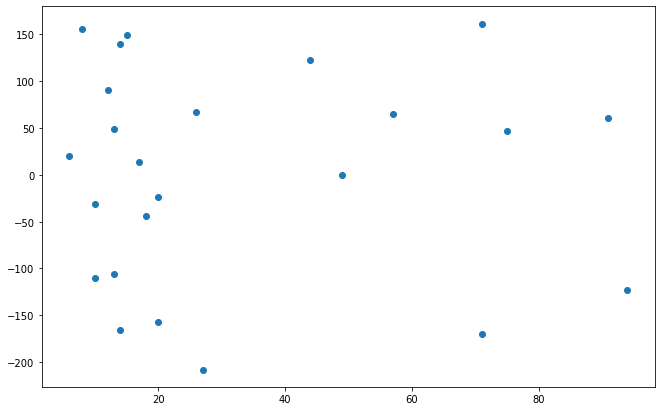

In [19]:
print('PARAMS: ', results1.params)

print(results1.rsquared)

plt.scatter(x1_const.iloc[:, 1], results1.resid)
plt.show()

In [24]:
# б) Южные данные: 

south_mort = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'South']['mortality']
south_hardness = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'South']['hardness']
south_hardness_shape = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'South'][['hardness']]

x2_train, x2_test, y2_train, y2_test = train_test_split(south_hardness_shape, south_mort, test_size=0.30, random_state=42)

x2_const = sm.add_constant(x2_train)

model_sm2 = sm.OLS(y2_train, x2_const)
results2 = model_sm2.fit()
print(results2.summary())



                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           7.30e-05
Time:                        07:07:59   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


PARAMS:  const      1640.2
hardness     -3.5
dtype: float64
0.6363808308877189


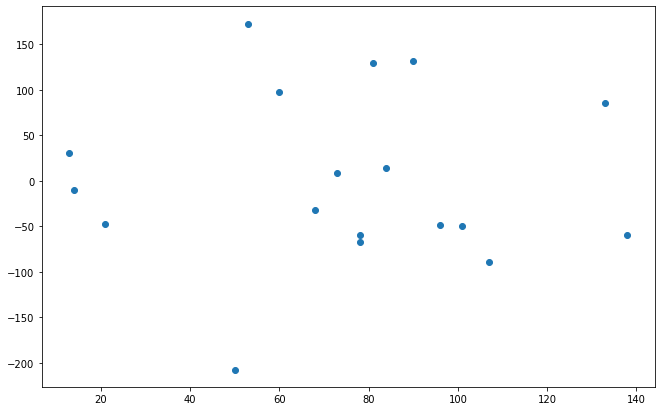

In [25]:
print('PARAMS: ', results2.params)

print(results2.rsquared)

plt.scatter(x2_const.iloc[:, 1], results2.resid)
plt.show()

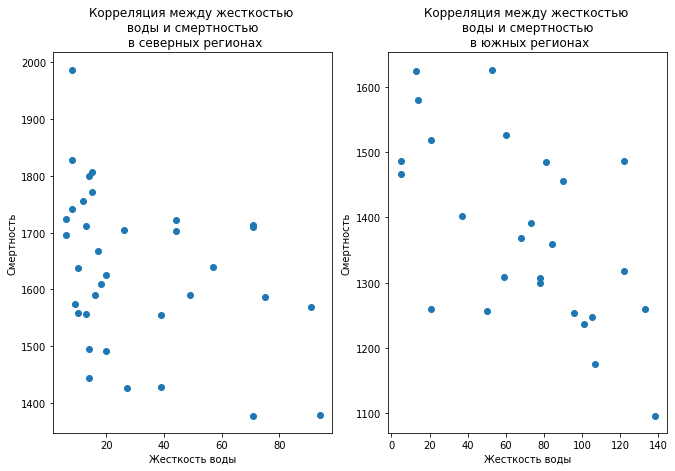

In [26]:
# Точечные графики: 

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(north_hardness, north_mort)
axes[0].set_xlabel('Жесткость воды')
axes[0].set_ylabel('Смертность')
axes[0].set_title('Корреляция между жесткостью \n воды и смертностью \n в северных регионах')

axes[1].scatter(south_hardness, south_mort)
axes[1].set_xlabel('Жесткость воды')
axes[1].set_ylabel('Смертность')
axes[1].set_title('Корреляция между жесткостью \n воды и смертностью \n в южных регионах')
plt.show()



In [ ]:
# Коэффициенты Пирсона, Спирмана

In [27]:
north_pearson = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'North'][['hardness', 'mortality']].corr('pearson')
north_spearman = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'North'][['hardness', 'mortality']].corr('spearman')

south_pearson = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'South'][['hardness', 'mortality']].corr('pearson')
south_spearman = water_mortality_corr_data.loc[water_mortality_corr_data['location'] == 'South'][['hardness', 'mortality']].corr('spearman')

print(north_pearson)
print(north_spearman)

print('\n')

print(south_pearson)
print(south_spearman)

           hardness  mortality
hardness        1.0       -0.4
mortality      -0.4        1.0
           hardness  mortality
hardness        1.0       -0.4
mortality      -0.4        1.0


           hardness  mortality
hardness        1.0       -0.6
mortality      -0.6        1.0
           hardness  mortality
hardness        1.0       -0.6
mortality      -0.6        1.0


In [ ]:
# Выводы:
# При разделении выборки на северный и южный регионы сильной корреляции между смертностью и жесткостью воды уже не наблюдается, наблюдается слабая обратная линейная корреляция, едва заметная на 
# точечном графике северных регионов, и чуть более заметная на графике южных регионов. Это видно и по коэффициентам Пирсона и Спирмана.